In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Prediction using Decision Tree Algorithm

# BY : VIGNESH. A

# **PROBLEM STATEMENT :
# Create the Decision Tree classifier and visualize it graphically.
# The purpose is if we feed any new data to this classifier, it would be able to
# predict the right class accordingly.****

In [20]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [21]:
iris = datasets.load_iris()
dt = pd.DataFrame(iris.data,columns=iris.feature_names)

In [22]:
## Import Dataset
def importdata():
    iris = datasets.load_iris()
    dt = pd.DataFrame(iris.data,iris.target,columns=iris.feature_names)
    dt.reset_index(inplace=True)
    ##Printing the dataset shape
    print("Datset Length",len(dt))
    print("Dataset shape",dt.shape)
    print("Dataset:",dt.head())
    return dt

In [23]:
##function to split the dataset
def splitdataset(dt):
    x=dt.values[:,1:4]
    y=dt.values[:,0]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    return x,y,x_train,x_test,y_train,y_test

In [24]:
##function to perform training with giniIndex
def train_using_gini(x_train,x_test,y_train):
    #creating the classifier object
    clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
    #performing training
    clf_gini.fit(x_train,y_train)
    return clf_gini

In [25]:
##Function to perform training with entropy
def train_using_entropy(x_train,x_test,y_train):
    ##decision tree with entropy
    clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)
    
    ##performing training
    clf_entropy.fit(x_train,y_train)
    return clf_entropy

In [26]:
##function to make predictions
def prediction(x_test,clf_object):
    ##Prediction on test with giniindex
    y_pred=clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [27]:
##Function to calculate accuracy
def cal_accuracy(y_test,y_pred):
    print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
    print("Accuracy:",accuracy_score(y_test,y_pred)*100)
    print("Report:",classification_report(y_test,y_pred))

In [28]:
##Driver code
def main():
    #Building phase
    data=importdata()
    x,y,x_train,x_test,y_train,y_test=splitdataset(data)
    clf_gini=train_using_gini(x_train,x_test,y_train)
    clf_entropy=train_using_entropy(x_train,x_test,y_train)
    #operational phase
    print('\n')
    print("Results using Gini Index:")
    
    
    #Prediction using gini
    y_pred_gini=prediction(x_test,clf_gini)
    cal_accuracy(y_test,y_pred_gini)
    print('\n')
    print("Results using Entropy:")
    
    
    #Prediction using entropy
    y_pred_entropy=prediction(x_test,clf_entropy)
    cal_accuracy(y_test,y_pred_entropy)

#Calling main function
if __name__=="__main__":
    main();

Datset Length 150
Dataset shape (150, 5)
Dataset:    index  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0      0                5.1               3.5                1.4   
1      0                4.9               3.0                1.4   
2      0                4.7               3.2                1.3   
3      0                4.6               3.1                1.5   
4      0                5.0               3.6                1.4   

   petal width (cm)  
0               0.2  
1               0.2  
2               0.2  
3               0.2  
4               0.2  


Results using Gini Index:
Predicted values:
[2. 0. 2. 0. 1. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 1. 1. 2. 2. 2. 2. 0. 2. 0.
 1. 2. 1. 0. 1. 2. 1. 1. 2. 0. 0. 1. 0. 1. 2. 2. 0. 1. 2. 2. 0.]
Confusion Matrix: [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy: 95.55555555555556
Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.91  

In [29]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


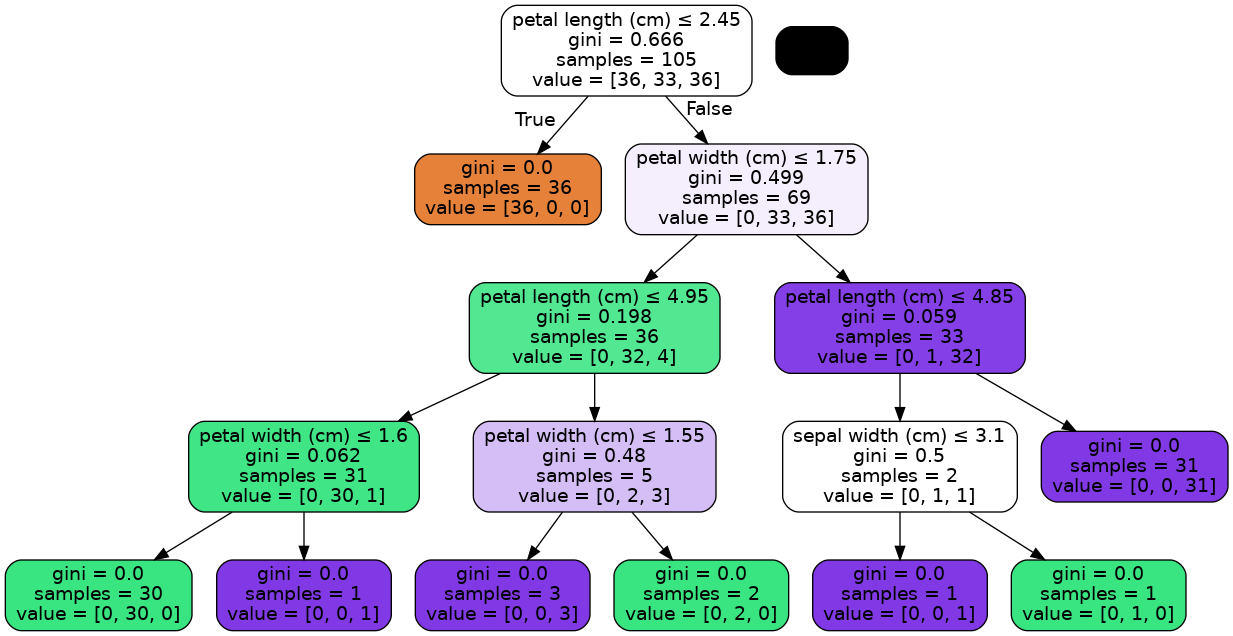

In [30]:
## Function to make tree
from io import StringIO ## for Python 3
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
y=iris.target
Feature_cols=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
x_train,x_test,y_train,y_test=train_test_split(dt,y,test_size=0.3,random_state=10)
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=Feature_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Subcategory.png')
Image(graph.create_png())